# The "Right Stuff"

Author: **Makenzi Fischbach and Trevor Zou**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.## Introduction

In [1]:
%load_ext autoreload
%autoreload 2

import functions as f
import matplotlib.pyplot as plt

## Introduction

We like astronauts anda compelling stories. We decided to look at astronauts through the years to know more about astronauts.

## Method

### Getting the data
First we found a dataset. We found it using the Kaggle API.

In [6]:
nasa_astronaut_dataset = f.get_data()

nasa_astronaut_dataset["State"] = nasa_astronaut_dataset["Birth Place"].str[-2:]

nasa_astronaut_dataset.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,CA
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,MT
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,NY
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,NJ


Here we have the dataset. Example of the Dataset.

Note that NaN's are there. We also decided to change the birth date and add the age they space-ed.

In [7]:
nasa_astronaut_dataset = f.change_dates(nasa_astronaut_dataset)

nasa_astronaut_dataset[["Name", "Year", "Birth Date", "Selection Age"]]

,Name,Year,Birth Date,Selection Age
0,Joseph M. Acaba,2004.0,1967.0,37.0
1,Loren W. Acton,NaN,1936.0,NaN
2,James C. Adamson,1984.0,1946.0,38.0
3,Thomas D. Akers,1987.0,1951.0,36.0
4,Buzz Aldrin,1963.0,1930.0,33.0
...,...,...,...,...
352,David A. Wolf,1990.0,1956.0,34.0
353,Neil W. Woodward III,1998.0,1962.0,36.0
354,Alfred M. Worden,1966.0,1932.0,34.0
355,John W. Young,1962.0,1930.0,32.0


Once we had that, we started to look at some genearl trends across all of the astronauts, regadless of time.

In [8]:
print(f.highest(nasa_astronaut_dataset, "Space Flight (hr)"))
print(f.highest(nasa_astronaut_dataset, "Space Walks (hr)"))

Jeffrey N. Williams has the most Space Flight (hr) with a total of 12818 hours.
Michael E. Lopez-Alegria has the most Space Walks (hr) with a total of 67.0 hours.


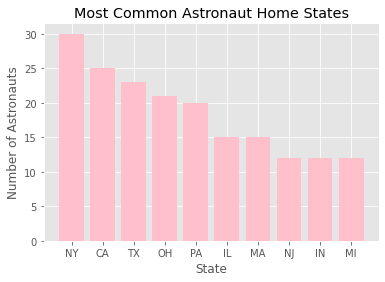

In [34]:
f.most_common_state(nasa_astronaut_dataset)

We also looked whhere astronauts came from, with the most popular states being New York and California.

We also wanted to look at what colleges astronauts came from as far as education back. They came from alot of different colleges, so we decided to show the top 10.

In [36]:
new = f.frequency(nasa_astronaut_dataset, 7)
f.tops(new, 10)

{'US Naval Academy': 52,
 'US Air Force Academy': 38,
 'MIT': 36,
 'US Naval Postgraduate School': 32,
 'Purdue University': 23,
 'Stanford University': 22,
 'US Military Academy': 18,
 'University of Colorado': 16,
 'Georgia Institute of Technology': 14,
 'University of Texas': 13}

Alot of people came from the army, as well as MIT! WOW!

We could do the same thing with undergraduate major.

In [116]:
new = f.frequency(nasa_astronaut_dataset,8)

f.tops(new, 10)

{'Physics': 36,
 'Aerospace Engineering': 33,
 'Mechanical Engineering': 31,
 'Aeronautical Engineering': 29,
 'Electrical Engineering': 24,
 'Engineering Science': 13,
 'Engineering': 12,
 'Mathematics': 12,
 'Chemistry': 12,
 'Chemical Engineering': 9}

In [117]:
f.engineer(nasa_astronaut_dataset)

36.144578313253014 %of Astronauts majored in Engineering


We see that alot of people majored in phsyics! WOW! And that alot of people majored in engineering!

We also wanted to look at how many people went to grad school.

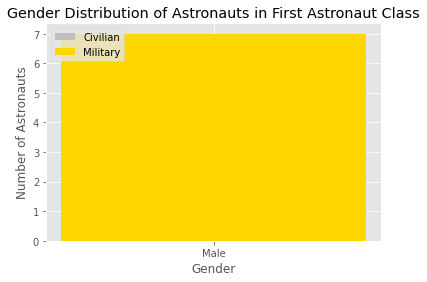

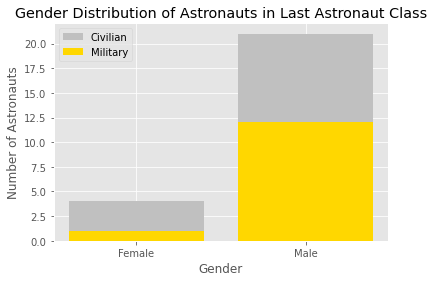

In [66]:
f.first_v_last(nasa_astronaut_dataset)

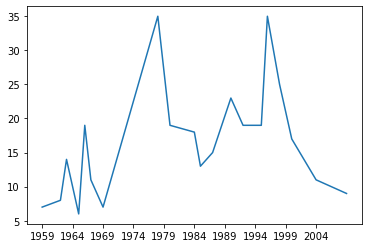

In [16]:
f.plot_astronauts_vs_time(nasa_astronaut_dataset)

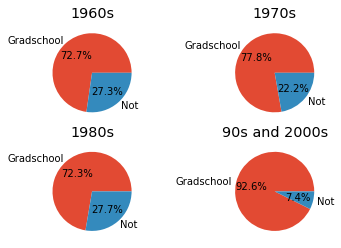

In [118]:
f.grad_school_over_time(nasa_astronaut_dataset)

We see that the educational side of astronauts goes higher over time, maybe having to do with 

This then lead us to think about how astronauts have changed over time
We then wanted to look first at how the number of astronauts has changed over time.

Interesting. Probably has to do with politics or some shit! Interesting feature is the jump in astronaut numbers and lull from 1969 to 1979

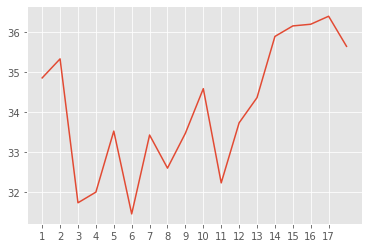

In [21]:
f.average_age_vs_group(nasa_astronaut_dataset)

Interestgly, the average age has a slight dip where apollo missions took place and they were desperate for young pilots.

In [122]:
deaths = f.frequency(nasa_astronaut_dataset, 18)
print(f.tops(deaths,3))

death_dates = f.frequency(nasa_astronaut_dataset, 17)
print(f.tops(death_dates,4))

{'STS 51-L (Challenger)': 7, 'STS-107 (Columbia)': 6, 'Apollo 1': 3}
{'1/28/1986': 7, '2/1/2003': 6, '1/27/1967': 3, '2/28/1966': 2}


## Results

## Results

In the results, you should show the main summaries or visualizations of your data, along with any accompanying information. In doing so, you should answer the following questions:

What summaries or visualizations did you create?
What are the interesting and/or important parts of these summaries or visualizations?
How do these results answer your questions or tell your story?

## Conclusion